# Problem Statement
For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically.

In [1]:
# Importing the libraries & required packages
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus
from sklearn.preprocessing import LabelEncoder
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Loading the data
data  = pd.read_csv("C:/Users/CANARA/Downloads/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [5]:
data['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [6]:
le.fit_transform(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa'])

array([1, 2, 0], dtype=int64)

In [7]:
data['Species'] = data['Species'].map({'Iris-versicolor': 1,
                                                     'Iris-virginica': 2,
                                                     'Iris-setosa': 0})

In [8]:
data['Species'].head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [12]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = data[features]
y = data.Species
from sklearn.model_selection import train_test_split
from sklearn import tree
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)
clf=clf.fit(X_train,y_train)


In [14]:
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [15]:
data.Species

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [16]:
def draw(dt_model, X, features):
    dot_data = StringIO()
    export_graphviz(dt_model, out_file = dot_data, feature_names = features, filled = True, rounded = True, special_characters = True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return(graph)

def model(X, y, features, max_leaf_nodes = None):
    dt_model = DecisionTreeClassifier(max_leaf_nodes = max_leaf_nodes, random_state = 1)
    trained_dt_model = dt_model.fit(X, y)
    return draw(dt_model, X, features)



In [17]:
!pip install graphviz
#conda install graphviz

In [21]:
from sklearn import tree

In [22]:
!pip install graphviz

In [30]:
decision_tree = tree.export_graphviz(clf,out_file='tree.dot',feature_names=features,max_depth=5,filled=True)

In [31]:
!dot -Tpng tree.dot -o tree.png

In [32]:
from matplotlib import pyplot as plt

<Figure size 1080x1080 with 0 Axes>

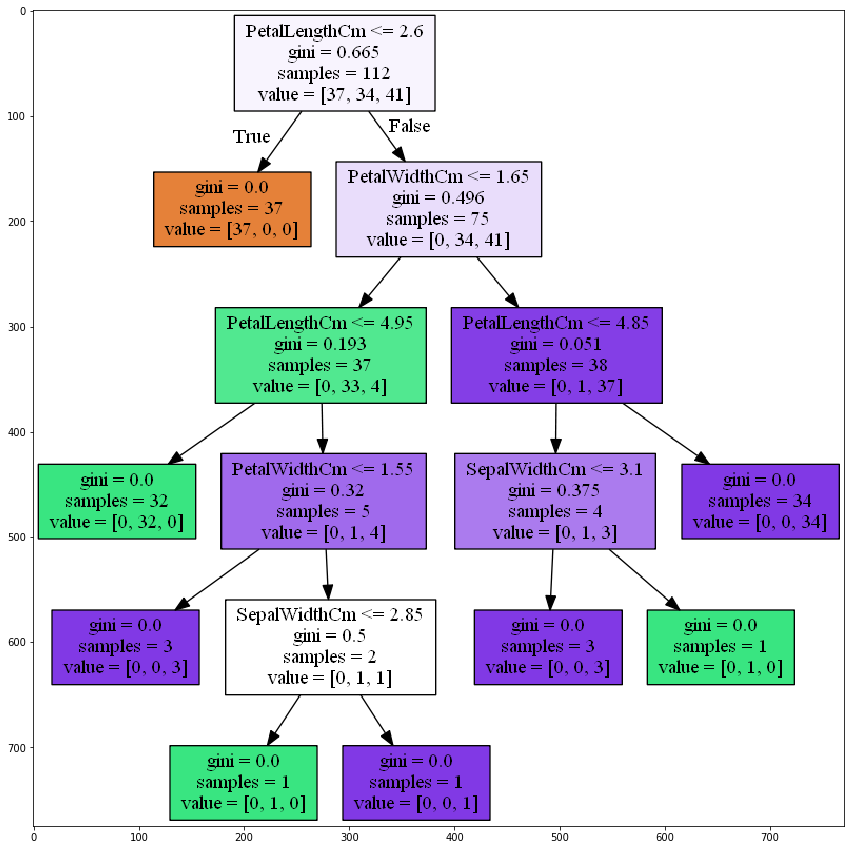

In [33]:
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)